In [365]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [366]:
PATH = 'images/boxes'
INPUT_SIZE = (128, 128, 1)

In [367]:
with open("categories.txt", "r") as file:
    categories = file.read().splitlines()
    
num_classes = len(categories)

In [368]:
dataset = []
X = []
y = []

i = 0
for folder in categories:
    files = os.listdir(f'{PATH}/{categories[i]}')
    for file in files:
        img = cv.imread(f'{PATH}/{categories[i]}/{file}')
#         img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        img = cv.resize(img, INPUT_SIZE[:2])
        dataset.append([img, i])
    i += 1

In [369]:
for images, labels in dataset:
    X.append(images)
    y.append(labels)

In [370]:
X = np.array(X).reshape(-1, INPUT_SIZE[0], INPUT_SIZE[1], INPUT_SIZE[2])
X = X / 255

In [371]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

In [372]:
y_cat_train = to_categorical(y_train, num_classes)
y_cat_test = to_categorical(y_test, num_classes)

In [388]:
epochs = 20
lr = 5e-5
batch_size = 1

input = tf.keras.layers.Input(INPUT_SIZE)

conv_1 = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input)
pool_1 = MaxPool2D(pool_size=(2,2))(conv_1)

conv_2 = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(pool_1)
pool_2 = MaxPool2D(pool_size=(2,2))(conv_2)

conv_3 = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(pool_2)
pool_3 = MaxPool2D(pool_size=(2,2))(conv_3)

flatten = Flatten()(pool_2)

dense = Dense(256, activation='relu')(flatten)
dropout = Dropout(0.2)(dense)

output = Dense(num_classes, activation="sigmoid")(dropout)

model = Model(inputs=[input], outputs=[output])
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=lr, decay=lr / epochs), metrics=["accuracy"])

In [389]:
model.fit(X_train, y_cat_train, batch_size=batch_size, epochs=epochs, validation_split=0.15, callbacks=[EarlyStopping(patience=2)])

Train on 115 samples, validate on 21 samples
Epoch 1/20
115/115 [==============================] - 8s 69ms/sample - loss: 0.7030 - accuracy: 0.5130 - val_loss: 0.6746 - val_accuracy: 0.6667
Epoch 2/20
115/115 [==============================] - 6s 50ms/sample - loss: 0.6836 - accuracy: 0.5609 - val_loss: 0.6245 - val_accuracy: 0.6667
Epoch 3/20
115/115 [==============================] - 6s 50ms/sample - loss: 0.6817 - accuracy: 0.5130 - val_loss: 0.6146 - val_accuracy: 0.6667
Epoch 4/20
115/115 [==============================] - 6s 50ms/sample - loss: 0.6317 - accuracy: 0.6304 - val_loss: 0.5709 - val_accuracy: 0.6667
Epoch 5/20
115/115 [==============================] - 6s 49ms/sample - loss: 0.6144 - accuracy: 0.6826 - val_loss: 0.5495 - val_accuracy: 0.6667
Epoch 6/20
115/115 [==============================] - 6s 51ms/sample - loss: 0.5897 - accuracy: 0.7261 - val_loss: 0.6091 - val_accuracy: 0.6905
Epoch 7/20
115/115 [==============================] - 6s 51ms/sample - loss: 0.5720 -

In [390]:
loss, acc = model.evaluate(X_test, y_cat_test)
print("LOSS: {}, ACC: {}".format(loss, acc * 100))

pred = model.predict(X_test)
pred_ = np.argmax(pred, axis=1)
print(classification_report(y_test, pred_))

25/25 [==============================] - 0s 7ms/sample - loss: 0.5484 - accuracy: 0.8800
LOSS: 0.5483812093734741, ACC: 87.99999952316284
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.91      0.83      0.87        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



0

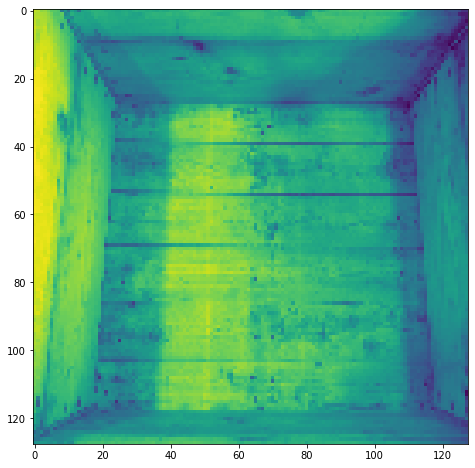

In [391]:
img = X_test[10]
plt.figure(figsize=(8,8))
plt.imshow(img[:,:,0])
img = img.reshape(-1, INPUT_SIZE[0], INPUT_SIZE[1], INPUT_SIZE[2])
# img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
model.predict(img)[0].argmax()

In [392]:
model.save('models/emptybox.h5')

array([[0.9677328 , 0.03226723]], dtype=float32)

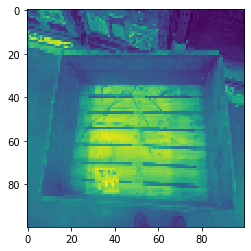

In [190]:
img = cv.imread('images/test/not_ok_96.jpg', 0)
img = cv.resize(img, (100,100))
img = img / 255
plt.imshow(img)
img = img.reshape(-1, INPUT_SIZE[0], INPUT_SIZE[1], INPUT_SIZE[2])
model.predict(img)


In [289]:
X_train.shape

(96, 224, 224, 3)